# Breast Cancer Wisconsin

Source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

## Attributes

1. Sample code number         
2. Clump Thickness            
3. Uniformity of Cell Size    
4. Uniformity of Cell Shape   
5. Marginal Adhesion          
6. Single Epithelial Cell Size
7. Bare Nuclei                
8. Bland Chromatin            
9. Normal Nucleoli            
10. Mitoses                   
11. Class:                        
  * 2 for benign
  * 4 for malignant

## Initial Analysis

In [28]:
import pandas as pd
import numpy as np

attributes = [
    "SampleCode"
    ,"ClumpThickness"
    ,"UniformityOfCellSize"   
    ,"UniformityOfCellShape"   
    ,"MarginalAdhesion"          
    ,"SingleEpithelialCellSize"
    ,"BareNuclei"                
    ,"BlandChromatin"            
    ,"NormalNucleoli"            
    ,"Mitoses"                   
    ,"Class"
]

classes = {
    2: "benign",
    4: "malignant"
}

bcw = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
    names=attributes,
    index_col="SampleCode",
    na_values="?"
)
X = pd.DataFrame(bcw)

y = pd.DataFrame(bcw["Class"])
y["ClassName"] = y.apply(lambda row: classes.get(row.Class), axis=1)

X = X.drop(columns=["Class"])
X.describe()

,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [29]:
import matplotlib.pyplot as plt

def plot_scatter(df, ax, dim=('C1','C2')):
    colors = ['b', 'r']
    
    for i, c in enumerate(classes.keys()):
        class_name = classes.get(c)
        ax.scatter(
            df[df['Class'] == c][dim[0]], 
            df[df['Class'] == c][dim[1]],  
            c=colors[i], cmap=plt.cm.Set1, label=class_name, edgecolor='k')
    
    ax.set_xticks(())
    ax.set_yticks(())
    

## Data preperation

Due to the existence of "null" values ('?') in the dataset, an "imputer" was used to replace this values with mean-values of the corresponding attribute. Standardization was not neccessary, the attributes are already scaled properly (1-10).

In [30]:
# Fill NaN data
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp_mean.fit_transform(X)

# No normalization needed.
df_std = pd.DataFrame(X_imp,index=X.index.values)
df_std.describe()

,0,1,2,3,4,5,6,7,8
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## PCA

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_std)
pca.explained_variance_ratio_

array([0.68897023, 0.07271567])

The first 2 components are only representing ~76% of the whole variance. To make a good visualisation possible only 2 PCs are used nevertheless. 

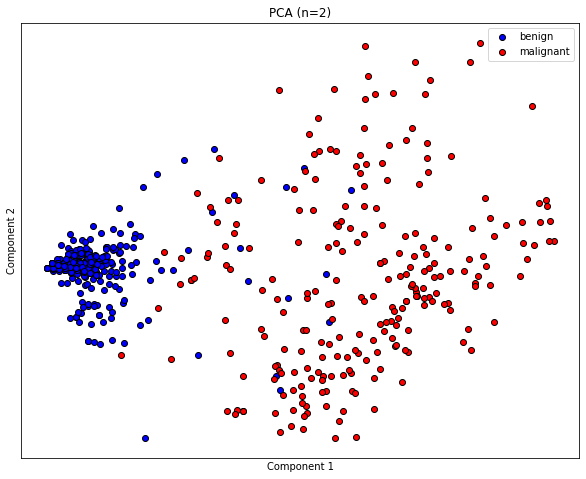

In [32]:
df_pca = pd.DataFrame(X_pca, index=X.index.values)

df_pca['Class'] = y['Class']
df_pca.columns = ['C1','C2','Class']

_, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.set_xlabel('Component 1') 
ax.set_ylabel('Component 2')
ax.set_title('PCA (n=2)') 

plot_scatter(df_pca, ax)

plt.legend()
plt.show()

## MDS

In [33]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X_mds = mds.fit_transform(df_std)
mds.stress_

686782.5000017527

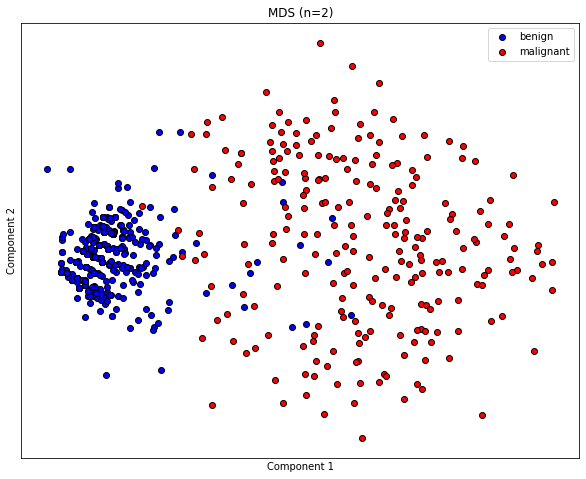

In [34]:
df_mds = pd.DataFrame(X_mds, index=X.index.values)

df_mds['Class'] = y['Class']
df_mds.columns = ['C1','C2','Class']

_, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_xlabel('Component 1') 
ax.set_ylabel('Component 2')
ax.set_title('MDS (n=2)') 

plot_scatter(df_mds, ax)

plt.legend()
plt.show()

The result is very simmilar to the PCA's shown above. Taken into account high computational afford, it as a disappointing result.

## t-SNE

In [57]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=2000)
X_tsne = tsne.fit_transform(df_std)
[tsne.kl_divergence_, tsne.n_iter_]

[0.6266424059867859, 1799]

An perplexity of 30 with a maximum of 2000 iterations tend to show a good result. The focus was on achiefing an well distiguished result (2 defined clusters) wich minimal spread of melignant point, because this would lead to false-negative results which should be avoided in this kind of scenario. 

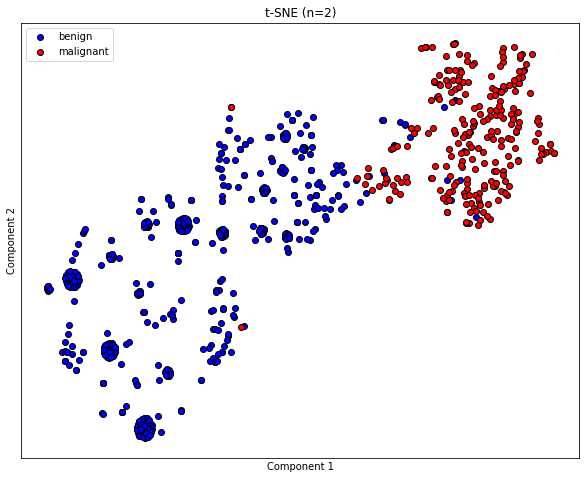

In [58]:
df_tsne = pd.DataFrame(X_tsne, index=X.index.values)

df_tsne['Class'] = y['Class']
df_tsne.columns = ['C1','C2','Class']

_, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_xlabel('Component 1') 
ax.set_ylabel('Component 2')
ax.set_title('t-SNE (n=2)') 

plot_scatter(df_tsne, ax)

plt.legend()
plt.show()

The result is quite promising. Both groups are well distinguished (in comparision to the other methods) and only very few malignant points are in the benign domain. 